<a href="https://colab.research.google.com/github/Hannah1011/llm-response-clustering/blob/main/SpectralClustering_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("/content/human_feedback_embedding_large_192_ver2.csv")
# Convert embeddings: string → numpy array
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)
matrix = np.vstack(df.embedding.values)
matrix.shape

(690, 192)

In [21]:
n_clusters = 10
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
labels = spectral.fit_predict(matrix)

In [22]:
# 차원 축소 (PCA + t-SNE 조합)
pca = PCA(n_components=96)
reduced_embeddings = pca.fit_transform(matrix)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(reduced_embeddings)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


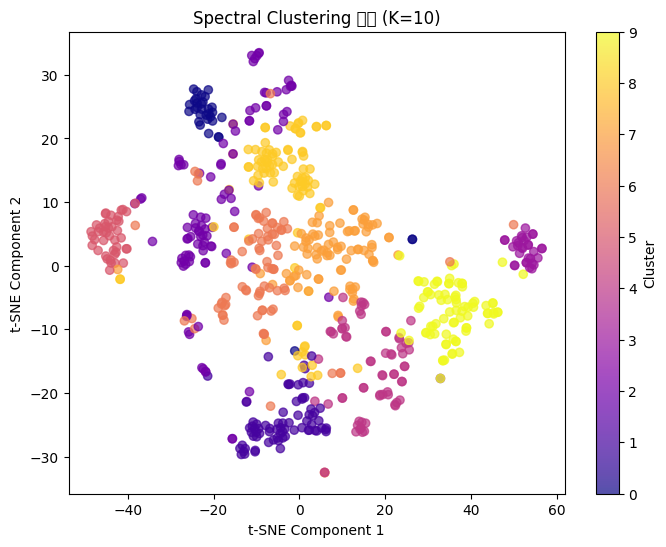

In [23]:
# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap="plasma", alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title(f"Spectral Clustering 결과 (K={n_clusters})")
plt.show()

In [24]:
# ✅ 6. 결과를 데이터프레임에 저장
df["cluster"] = labels  # 클러스터 라벨 추가
df["cluster"].value_counts()

,count
cluster,
2,99
8,93
7,87
6,85
9,80
1,73
4,65
5,43
0,33


In [13]:
df.to_csv("df_clustered.csv", index=False, encoding="utf-8-sig")  # CSV 저장
print("✅ 클러스터링 결과 저장 완료! (df_clustered.csv)")

,count
cluster,
3,266
4,91
1,69
7,65
5,51
9,43
2,35
6,32
8,28
